# Logistic Regression Inference
## Choosing between Sparse and Dense Vector Representations

In this demo, we consider a Logistic Regression Inference workload, where we're given multiple models, and we want to determine the model with highest validation accuracy.

We will use Kostos to determine the best vector representation for the feature and weight vectors.

First, let's import some modules.

In [1]:
# Import statements.
import kostos
import subprocess
import utils

Also, we need to specify the distribution of sparsities -- here, we assume the sparsity of the vectors varies uniformly from 0.0 to 1.0.

In [2]:
range_params = {
    's': {
        "start":0.0,
        "stop":1.0,
        "step":0.1,
        "type":"float"
    }
}

Finally, let's define a run function that will run Kostos' adaptive optimizer to determine the right plan to pick.

In [3]:
# Run passed in benchmark, with provided params.
def run(bench_name, params, title):
    # Run the different plans for the Logistic Evaluation workload.
    times = kostos.run_benchmark(bench_name, params)
    
    # Run Kostos' adaptive optimizer to determine the optimal plan to run.
    plan, measurements = kostos.run_adaptive(bench_name, params, range_params)
    tot_measurement_time = sum([float(val) for (_, val) in measurements.items()])
    print("Kostos picked %s, with additional overhead of %f" % (plan, tot_measurement_time))
    times['Kostos'] = times[plan] + tot_measurement_time
    
    utils.plot_results(times, title)

And now we're ready to run stuff!

We're going to control the sparsity of the input data through the `s` parameter. First, let's try `s = 0.99`. Note that Kostos isn't passed in this `s` parameter.

Estimated value of s: 0.991000
Kostos picked Blocked matrix multiply, with additional overhead of 0.000168


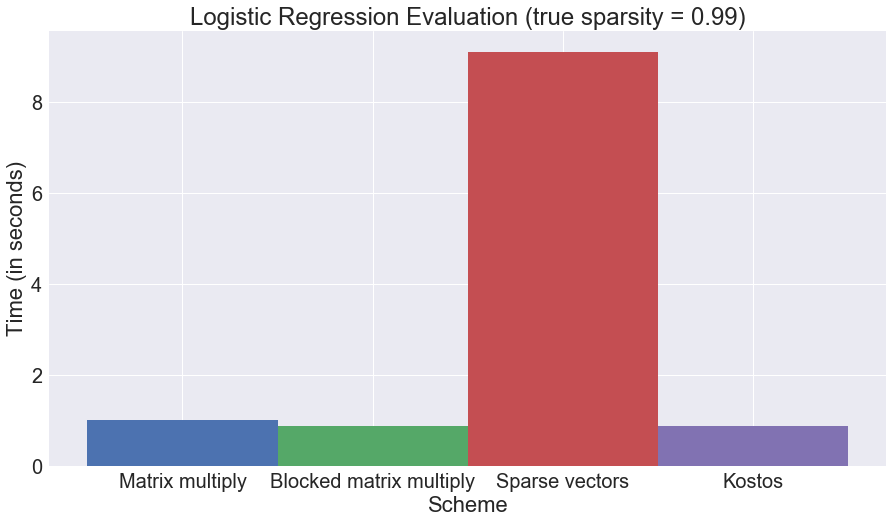

In [4]:
run('log_reg_evaluation', [('s', 0.99), ('m', 2048), ('r', 50), ('n', 30000)],
    "Logistic Regression Evaluation (true sparsity = 0.99)")

Now, let's try `s = 0.001`.

Estimated value of s: 0.001000
Kostos picked Sparse vectors, with additional overhead of 0.000053


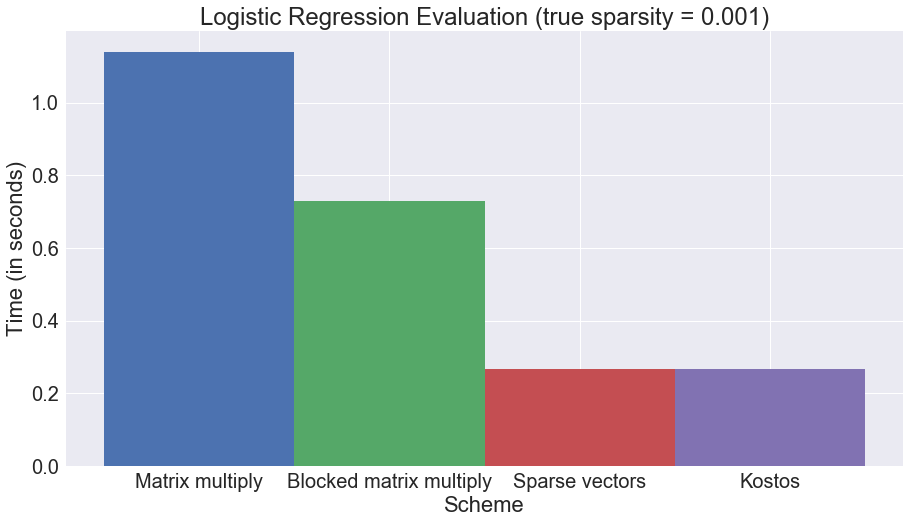

In [5]:
run('log_reg_evaluation', [('s', 0.001), ('m', 2048), ('r', 50), ('n', 30000)],
    "Logistic Regression Evaluation (true sparsity = 0.001)")